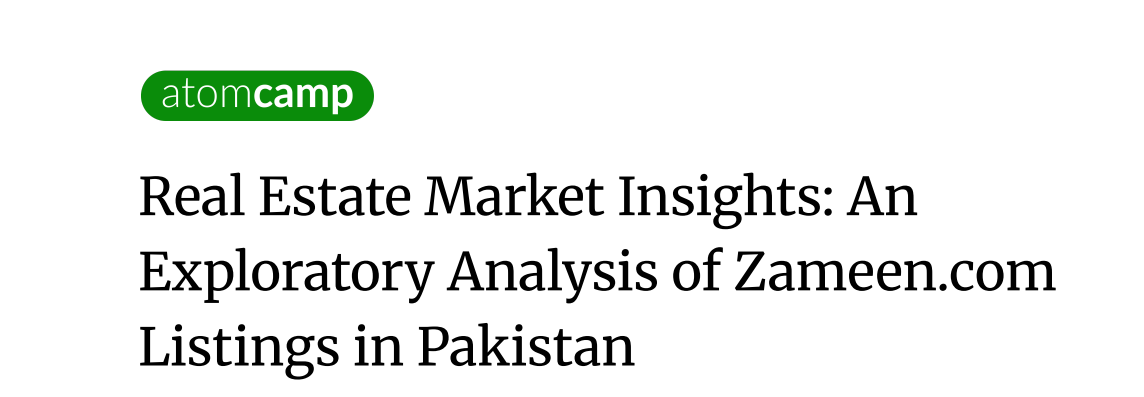

# **Project Objective:**

To extract actionable insights from property listings on Zameen.com -such as pricing
trends, neighborhood comparisons, and listing quality -that can help real estate
investors make informed decisions.


**Import libraries**

In [129]:
!pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.1 MB/s eta 0:00:00


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from warnings import filterwarnings
filterwarnings('ignore')
from fuzzywuzzy import process

**Load Data**

In [56]:
url="https://docs.google.com/spreadsheets/d/1jnt2UEGt-R2pKlUslVcdHwqwysrekoAZ/export?format=csv&ouid=106447157990861992697&rtpof=true&sd=true"

In [57]:
df=pd.read_csv(url)

In [58]:
df.head()

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.columns

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

**Observations:**
- First, clean the dataset by removing unnecessary columns,
as there are many columns that have no impact on the data.



In [60]:
new_df=df[['Title','City','Area','Price','Type','Bedrooms','Bathrooms','Description','Location']]

In [61]:
new_df.head()

,Title,City,Area,Price,Type,Bedrooms,Bathrooms,Description,Location
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,Karachi,128 Sq. Yd.,PKR\n4.75 Crore,Flat,2,2,SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,"DHA Defence, Karachi, Sindh"
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,Karachi,161 Sq. Yd.,PKR\n6.25 Crore,Flat,2,3,Live the Seafront Dream at H&S Residence \n2 B...,"DHA Defence, Karachi, Sindh"
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,Karachi,111 Sq. Yd.,PKR\n3.45 Crore,Flat,1,2,Live the Seafront Dream at H&S Residence \n1 B...,"DHA Defence, Karachi, Sindh"
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,Karachi,106 Sq. Yd.,PKR\n2.98 Crore,Flat,1,2,Chance Deal at HMR Waterfront 1-Bed Apartment ...,"DHA Defence, Karachi, Sindh"
4,2 Bed Apartment For Booking On 3 Years | Saima...,Karachi,156 Sq. Yd.,PKR\n4.65 Crore,Flat,2,2,HMR WATERFRONT \n\nOwn Your Dream Apartment in...,"DHA Defence, Karachi, Sindh"


<p align="center">
  <img src="https://img.shields.io/badge/Project_Sections-1a237e?style=for-the-badge&logoColor=white">
</p>


**Problem Statement:**

***What drives property prices in Pakistan?***

This analysis aims to identify the key factors influencing property prices in Pakistan based on the provided Zameen.com dataset. By exploring the relationships between various property features and their prices, we can gain insights into what makes a property more or less valuable in the Pakistani real estate market.

<p align="center">
  <img src="https://img.shields.io/badge/Data%20Understanding%20%26%20Preprocessing-DeepSkyBlue?style=for-the-badge&logo=google-analytics&logoColor=white">
</p>


In [62]:
new_df.head()

,Title,City,Area,Price,Type,Bedrooms,Bathrooms,Description,Location
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,Karachi,128 Sq. Yd.,PKR\n4.75 Crore,Flat,2,2,SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,"DHA Defence, Karachi, Sindh"
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,Karachi,161 Sq. Yd.,PKR\n6.25 Crore,Flat,2,3,Live the Seafront Dream at H&S Residence \n2 B...,"DHA Defence, Karachi, Sindh"
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,Karachi,111 Sq. Yd.,PKR\n3.45 Crore,Flat,1,2,Live the Seafront Dream at H&S Residence \n1 B...,"DHA Defence, Karachi, Sindh"
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,Karachi,106 Sq. Yd.,PKR\n2.98 Crore,Flat,1,2,Chance Deal at HMR Waterfront 1-Bed Apartment ...,"DHA Defence, Karachi, Sindh"
4,2 Bed Apartment For Booking On 3 Years | Saima...,Karachi,156 Sq. Yd.,PKR\n4.65 Crore,Flat,2,2,HMR WATERFRONT \n\nOwn Your Dream Apartment in...,"DHA Defence, Karachi, Sindh"


In [63]:
new_df.tail()

,Title,City,Area,Price,Type,Bedrooms,Bathrooms,Description,Location
18250,10 Marla Double Storey House Available For At...,Nowshera,10 Marla,PKR\n40 Thousand,House,5,5,Malik Real Estate and Builders Take your pick ...,"Armour Colony, Nowshera, Khyber Pakhtunkhwa"
18251,2 Marla Double Storey House For In Okara Shah...,Okara,2 Marla,PKR\n14 Thousand,House,2,2,NaN,"Shah Din Road, Okara, Punjab"
18252,8 Marla Single Story House Is Available For I...,Okara,8 Marla,PKR\n40 Thousand,House,3,3,8 Marla Single Story House Is Available For I...,"Umer Din Town, Okara, Punjab"
18253,Beautiful House For In Attock Cantt,Attock,1 Kanal,PKR\n1 Lakh,House,6,5,NaN,"Cantt, Attock, Punjab"
18254,10 Marla House Available For,Dera Ghazi Khan,10 Marla,PKR\n60 Thousand,House,4,3,NaN,"Drishak Town, Dera Ghazi Khan, Punjab"


In [64]:
display(new_df.describe(include='all').T)

,count,unique,top,freq
Title,18239,16064,House For Sale,43
City,18255,84,Karachi,1250
Area,18239,468,5 Marla,3528
Price,18239,1022,PKR\n60 Thousand,269
Type,18239,7,House,13386
Bedrooms,18239,12,5,4174
Bathrooms,18239,10,6,4993
Description,14893,13617,Marriott Estate And Builders Offer a Ideal Hou...,33
Location,18239,1051,"Bahria Town Rawalpindi, Rawalpindi, Punjab",1884


In [65]:
#basic info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        18239 non-null  object
 1   City         18255 non-null  object
 2   Area         18239 non-null  object
 3   Price        18239 non-null  object
 4   Type         18239 non-null  object
 5   Bedrooms     18239 non-null  object
 6   Bathrooms    18239 non-null  object
 7   Description  14893 non-null  object
 8   Location     18239 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [66]:
print("Shape:", df.shape)

Shape: (18255, 59)


In [67]:
# Check duplicates
dup_all = new_df.duplicated()
print("Total duplicate rows (exact):", dup_all.sum())

Total duplicate rows (exact): 281


In [68]:
new_df=new_df.drop_duplicates()

In [69]:
# Check duplicates
dup_all = new_df.duplicated()
print("Total duplicate rows (exact):", dup_all.sum())

Total duplicate rows (exact): 0


In [70]:
new_df['Price'].unique()

array(['PKR\n4.75 Crore', 'PKR\n6.25 Crore', 'PKR\n3.45 Crore', ...,
       'PKR\n27.5 Thousand', 'PKR\n48.5 Thousand', 'PKR\n11.9 Thousand'],
      dtype=object)

In [71]:
def clean_price(value):
    if pd.isna(value):
        return np.nan

    s = str(value).replace('\n', ' ').lower().strip()
    s = s.replace('pkr', '').replace(',', '').strip()

    # Define unit multipliers
    unit_map = {
        'crore': 10_000_000,
        'cr': 10_000_000,
        'lakh': 100_000,
        'lac': 100_000,
        'thousand': 1_000,
        'k': 1_000
    }

    # Extract numeric value (handles 4.75, 11.9 etc.)
    num_match = re.search(r'[\d\.]+', s)
    if not num_match:
        return np.nan
    num = float(num_match.group())

    # Find and apply the correct multiplier
    multiplier = 1
    for unit, factor in unit_map.items():
        if unit in s:
            multiplier = factor
            break

    return num * multiplier
new_df['Price']=new_df['Price'].apply(clean_price)


In [72]:
new_df['Price'].describe()

,Price
count,1.796600e+04
mean,2.952199e+07
std,6.238301e+07
min,1.000000e+00
25%,1.400000e+05
50%,1.480000e+07
75%,3.450000e+07
max,9.900000e+08


In [80]:
new_df['Area'].unique()

array(['128 Sq. Yd.', '161 Sq. Yd.', '111 Sq. Yd.', '106 Sq. Yd.',
       '156 Sq. Yd.', '217 Sq. Yd.', '240 Sq. Yd.', '200 Sq. Yd.',
       '300 Sq. Yd.', '189 Sq. Yd.', '131 Sq. Yd.', '250 Sq. Yd.',
       '178 Sq. Yd.', '211 Sq. Yd.', '222 Sq. Yd.', '262 Sq. Yd.',
       '370 Sq. Yd.', '98 Sq. Yd.', '157 Sq. Yd.', '500 Sq. Yd.',
       '272 Sq. Yd.', '375 Sq. Yd.', '120 Sq. Yd.', '59 Sq. Yd.',
       '139 Sq. Yd.', '151 Sq. Yd.', '1,000 Sq. Yd.', '600 Sq. Yd.',
       '72 Sq. Yd.', '125 Sq. Yd.', '233 Sq. Yd.', '350 Sq. Yd.',
       '206 Sq. Yd.', '150 Sq. Yd.', '306 Sq. Yd.', '160 Sq. Yd.',
       '267 Sq. Yd.', '152 Sq. Yd.', '550 Sq. Yd.', '167 Sq. Yd.',
       '1,008 Sq. Yd.', '83 Sq. Yd.', '194 Sq. Yd.', '122 Sq. Yd.',
       '94 Sq. Yd.', '235 Sq. Yd.', '210 Sq. Yd.', '356 Sq. Yd.',
       '317 Sq. Yd.', '14 Sq. Yd.', '80 Sq. Yd.', '96 Sq. Yd.',
       '133 Sq. Yd.', '294 Sq. Yd.', '230 Sq. Yd.', '511 Sq. Yd.',
       '333 Sq. Yd.', '244 Sq. Yd.', '256 Sq. Yd.', '467 Sq. Yd.',

In [81]:
def clean_area(value):
    if pd.isna(value):
        return np.nan

    s = str(value).replace(',', '').strip().lower()

    # Extract numeric value (supports decimals)
    num_match = re.search(r'[\d\.]+', s)
    if not num_match:
        return np.nan
    num = float(num_match.group())

    # Detect unit and apply conversion
    if 'marla' in s:
        return num * 272.25
    elif 'kanal' in s:
        return num * 5445
    elif 'sq. yd' in s or 'sq yd' in s or 'yard' in s:
        return num * 9
    elif 'sqft' in s or 'sq. ft' in s or 'square feet' in s:
        return num
    else:
        return np.nan

new_df['Area'] = new_df['Area'].apply(clean_area)

In [83]:
new_df['Area'].describe()

,Area
count,1.796600e+04
mean,1.688576e+04
std,1.828042e+06
min,0.000000e+00
25%,1.361250e+03
50%,2.178000e+03
75%,3.267000e+03
max,2.450250e+08


<p align="center">
  <img src="https://img.shields.io/badge/Missing%20Values-Treatment-orange?style=for-the-badge&logo=google&logoColor=white">
</p>


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17974 entries, 0 to 18254
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        17966 non-null  object 
 1   City         17974 non-null  object 
 2   Area         17966 non-null  float64
 3   Price        17966 non-null  float64
 4   Type         17966 non-null  object 
 5   Bedrooms     17094 non-null  float64
 6   Bathrooms    16895 non-null  float64
 7   Description  14676 non-null  object 
 8   Location     17966 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [86]:
new_df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
new_df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')

In [91]:
missing_percent = (new_df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

Description    18.066283
Bathrooms       5.910709
Bedrooms        4.820597
Title           0.043824
Type            0.043824
Price           0.043824
Area            0.043824
Location        0.043824
dtype: float64


In [92]:
new_df['Title'].fillna(new_df['Title'].mode()[0], inplace=True)
new_df['Type'].fillna(new_df['Type'].mode()[0], inplace=True)
new_df['Location'].fillna(method='ffill', inplace=True)

**Justification:**

- Mode replaces missing entries with the most frequent value (suitable for short text/categorical data).

- Forward Fill (ffill) ensures continuity in Location, assuming nearby listings share similar areas.

In [93]:
new_df['Price'].fillna(new_df['Price'].median(), inplace=True)
new_df['Area'].fillna(new_df['Area'].median(), inplace=True)
new_df['Bedrooms'].fillna(new_df['Bedrooms'].mode()[0], inplace=True)
new_df['Bathrooms'].fillna(new_df['Bathrooms'].mode()[0], inplace=True)

**Justification:**

- Median handles outliers better for Price and Area.

- Mode maintains realistic integer counts for Bedrooms and Bathrooms.

In [94]:
new_df['Description'].fillna('No description provided', inplace=True)

**Justification:**
- Filling text-based columns with a neutral placeholder avoids null issues and maintains data consistency.

In [95]:
new_df.isnull().sum()

,0
Title,0
City,0
Area,0
Price,0
Type,0
Bedrooms,0
Bathrooms,0
Description,0
Location,0


<p align="center">
  <img src="https://img.shields.io/badge/Outliers-Removal-red?style=for-the-badge&logo=python&logoColor=white">
</p>


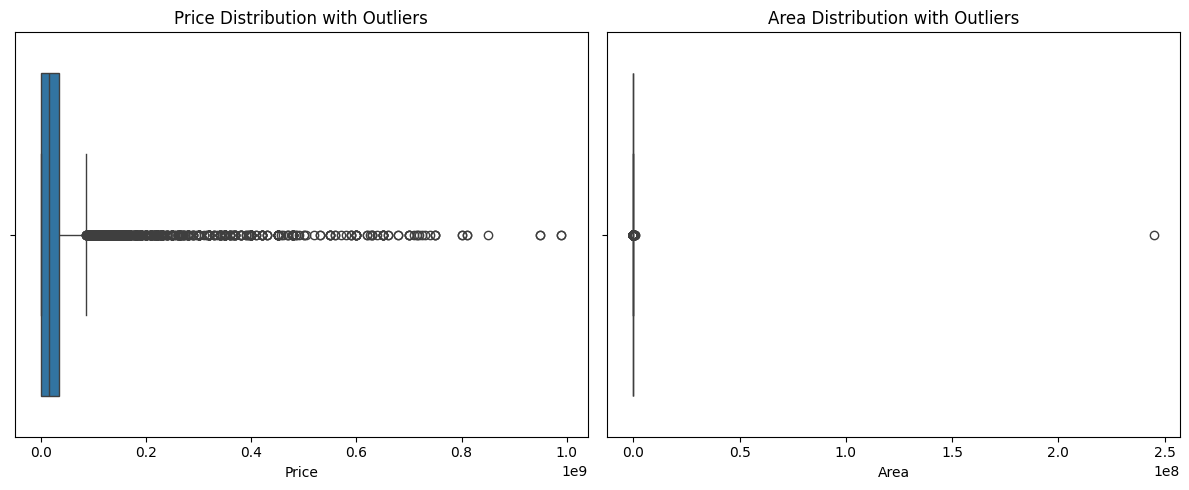

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['Price'])
plt.title('Price Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=new_df['Area'])
plt.title('Area Distribution with Outliers')

plt.tight_layout()
plt.show()

In [100]:
num_cols = ['Area', 'Price', 'Bedrooms', 'Bathrooms']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers detected")

Area: 2331 outliers detected
Price: 885 outliers detected
Bedrooms: 219 outliers detected
Bathrooms: 0 outliers detected


In [101]:
# Outlier Capping using IQR method
num_cols = ['Area', 'Price', 'Bedrooms', 'Bathrooms']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

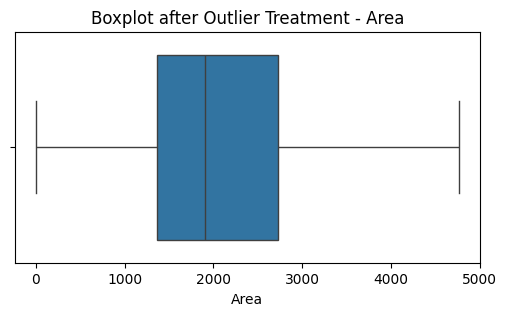

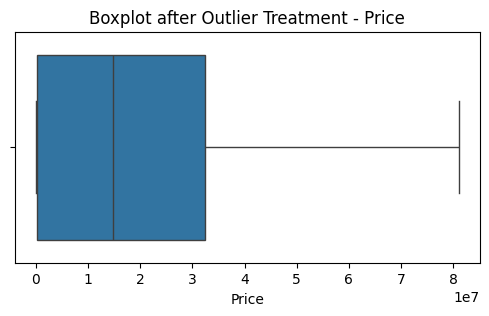

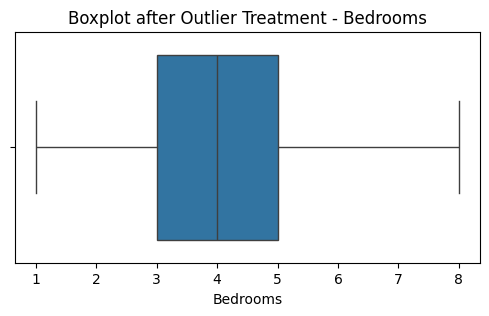

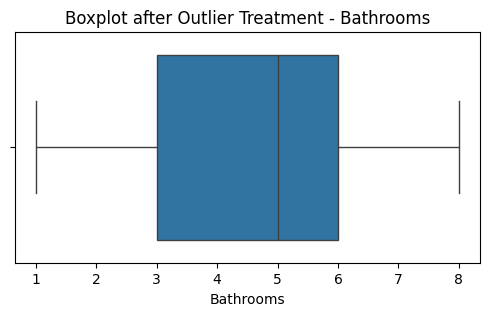

In [102]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot after Outlier Treatment - {col}')
    plt.show()

**Justification**

- Capping was preferred over deletion to retain valuable data points.

- It minimizes distortion from extreme values while maintaining dataset integrity.

- Especially in real estate data (like Area and Price), outliers may represent luxury or large properties so removing them could bias results.

<p align="center">
  <img src="https://img.shields.io/badge/Data%20Cleaning-Clean%20&%20Consistent-green?style=for-the-badge&logo=pandas&logoColor=white">
</p>


In [104]:
new_df['City'] = new_df['City'].str.strip().str.title()
new_df['City'].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
       'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
       'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
       'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
       'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
       'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
       'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
       'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian'], dtype=object)

In [127]:
standard_cities = ['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
                   'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
                   'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
                   'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
                   'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
                   'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
                   'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
                   'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
                   'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
                   'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
                   'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian']

In [131]:
def standardize_city(city_name):
    match, score = process.extractOne(str(city_name), standard_cities)
    if score >= 80:   # Adjust threshold as needed
        return match
    else:
        return city_name

In [132]:
# Assuming your dataset is in df and column is 'City'
new_df['City_Standardized'] = new_df['City'].apply(standardize_city)

# Optional: check the results
print(new_df[['City', 'City_Standardized']].head(20))


       City City_Standardized
0   Karachi           Karachi
1   Karachi           Karachi
2   Karachi           Karachi
3   Karachi           Karachi
4   Karachi           Karachi
5   Karachi           Karachi
6   Karachi           Karachi
7   Karachi           Karachi
8   Karachi           Karachi
9   Karachi           Karachi
10  Karachi           Karachi
11  Karachi           Karachi
12  Karachi           Karachi
13  Karachi           Karachi
14  Karachi           Karachi
15  Karachi           Karachi
16  Karachi           Karachi
17  Karachi           Karachi
18  Karachi           Karachi
19  Karachi           Karachi


In [133]:
new_df['City_Standardized'].value_counts()

,count
City_Standardized,
Karachi,2484
Islamabad,2480
Rawalpindi,2465
Lahore,2401
Multan,1589
Gujranwala,1561
Faisalabad,1505
Peshawar,1140
Sialkot,486


In [105]:
new_df['Type'].unique()

array(['Flat', 'House', 'Upper Portion', 'Lower Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

<p align="center">
  <img src="https://img.shields.io/badge/Feature-Engineering-blue?style=for-the-badge&logo=python&logoColor=white">
</p>

In [107]:
def convert_price(value):
    # Handle missing or numeric values
    if pd.isnull(value):
        return np.nan
    value = str(value).replace('PKR', '').replace('\n', '').strip()

    try:
        if 'Crore' in value:
            return float(value.replace('Crore', '').strip()) * 1e7
        elif 'Lakh' in value:
            return float(value.replace('Lakh', '').strip()) * 1e5
        elif 'Thousand' in value:
            return float(value.replace('Thousand', '').strip()) * 1e3
        else:
            return float(value)
    except:
        return np.nan  # in case of parsing errors

# Apply conversion
new_df['Price_Numeric'] = new_df['Price'].apply(convert_price)

In [108]:
new_df[['Price', 'Price_Numeric']].head(10)

,Price,Price_Numeric
0,47500000.0,47500000.0
1,62500000.0,62500000.0
2,34500000.0,34500000.0
3,29800000.0,29800000.0
4,46500000.0,46500000.0
5,26000000.0,26000000.0
6,67500000.0,67500000.0
7,16800000.0,16800000.0
8,80000000.0,80000000.0
9,44000000.0,44000000.0


In [109]:
# Price per square foot
new_df['Price_per_sqft'] = new_df['Price_Numeric'] / new_df['Area']
# Total rooms
new_df['Total_Rooms'] = new_df['Bedrooms'] + new_df['Bathrooms']


In [113]:
new_df.head()

,Title,City,Area,Price,Type,Bedrooms,Bathrooms,Description,Location,Price_Numeric,Price_per_sqft,Total_Rooms
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,Karachi,1152.0,47500000.0,Flat,2.0,2.0,SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,"DHA Defence, Karachi, Sindh",47500000.0,41232.638889,4.0
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,Karachi,1449.0,62500000.0,Flat,2.0,3.0,Live the Seafront Dream at H&S Residence \n2 B...,"DHA Defence, Karachi, Sindh",62500000.0,43133.195307,5.0
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,Karachi,999.0,34500000.0,Flat,1.0,2.0,Live the Seafront Dream at H&S Residence \n1 B...,"DHA Defence, Karachi, Sindh",34500000.0,34534.534535,3.0
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,Karachi,954.0,29800000.0,Flat,1.0,2.0,Chance Deal at HMR Waterfront 1-Bed Apartment ...,"DHA Defence, Karachi, Sindh",29800000.0,31236.897275,3.0
4,2 Bed Apartment For Booking On 3 Years | Saima...,Karachi,1404.0,46500000.0,Flat,2.0,2.0,HMR WATERFRONT \n\nOwn Your Dream Apartment in...,"DHA Defence, Karachi, Sindh",46500000.0,33119.658120,4.0


<p align="center">
  <img src="https://img.shields.io/badge/Analysis-Univariate%20%26%20Bivariate-purple?style=for-the-badge&logo=matplotlib&logoColor=white">
</p>


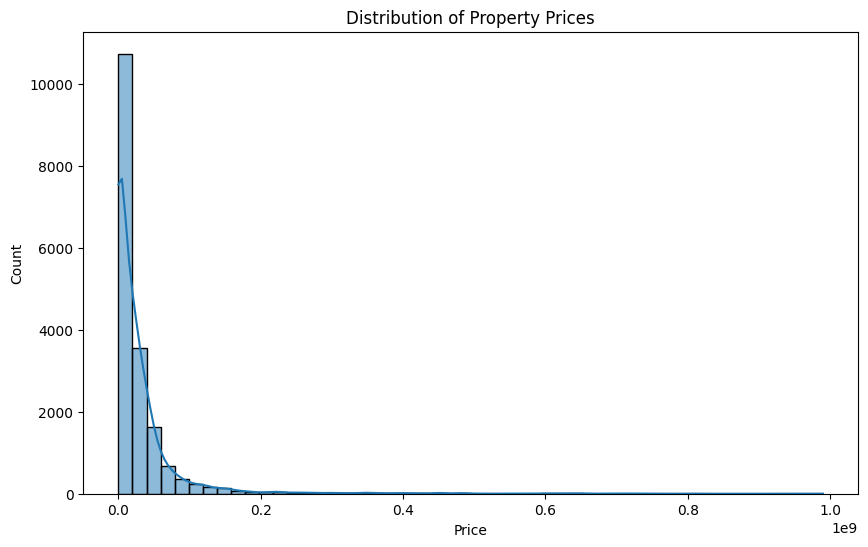

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(new_df['Price_Numeric'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

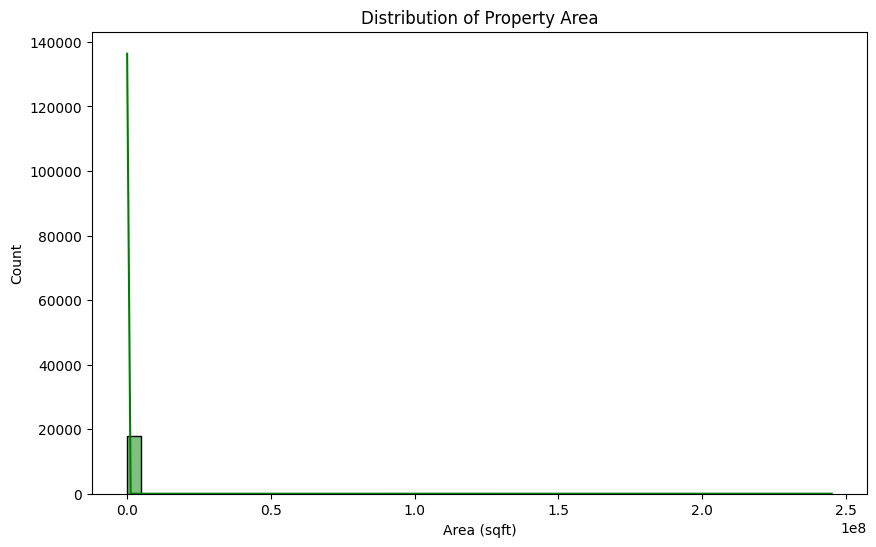

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(new_df['Area'], bins=50, kde=True, color='green')
plt.title("Distribution of Property Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Price_Log', ylabel='Count'>

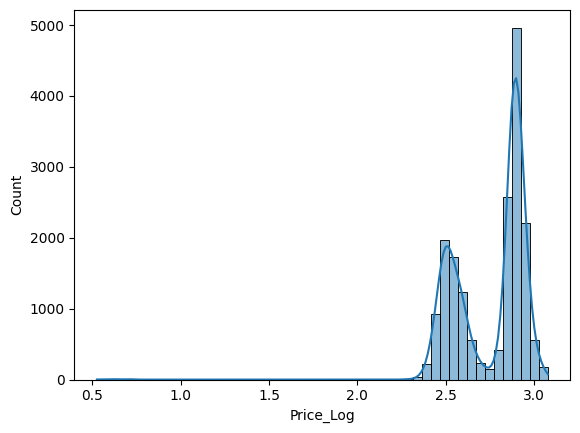

In [119]:
new_df['Price_Log'] = np.log1p(new_df['Price_Numeric'])
sns.histplot(new_df['Price_Log'], bins=50, kde=True)

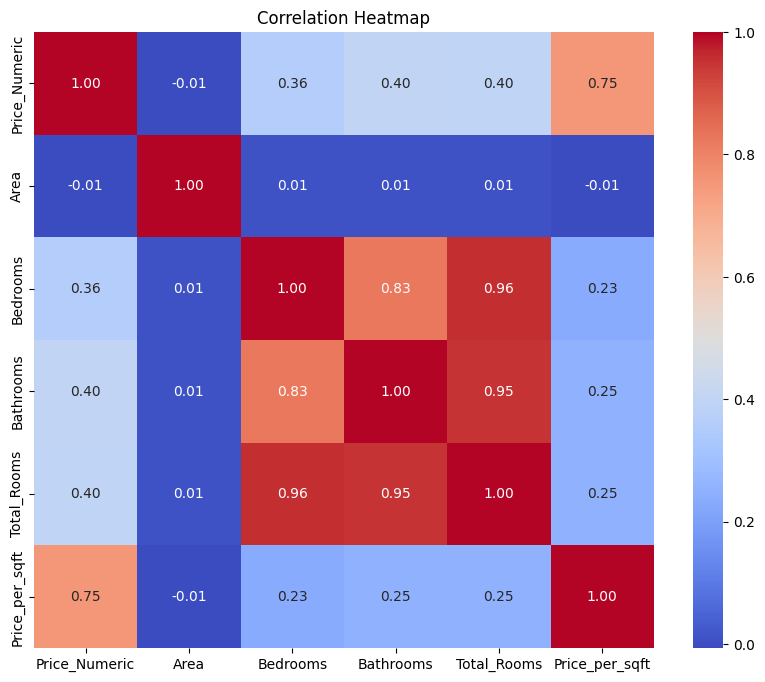

In [120]:
plt.figure(figsize=(10,8))
corr = new_df[['Price_Numeric', 'Area', 'Bedrooms', 'Bathrooms', 'Total_Rooms', 'Price_per_sqft']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

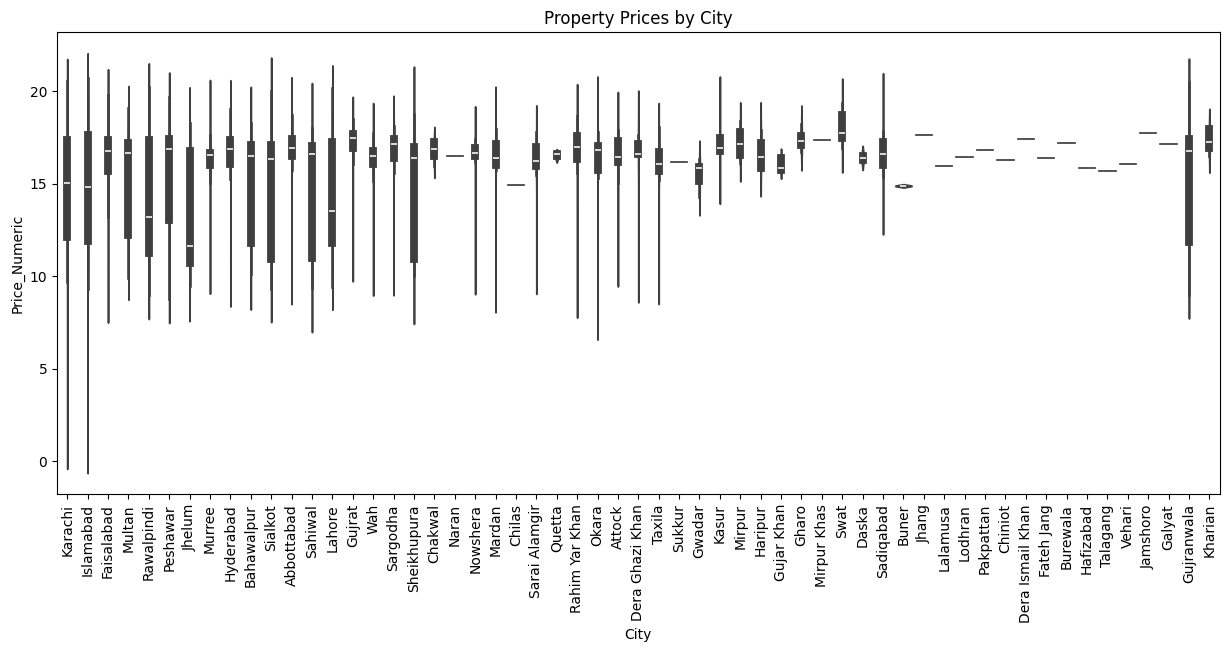

In [124]:
plt.figure(figsize=(15,6))
sns.violinplot(x='City', y='Price_Numeric', data=new_df)
plt.xticks(rotation=90)
plt.title("Property Prices by City")
plt.show()

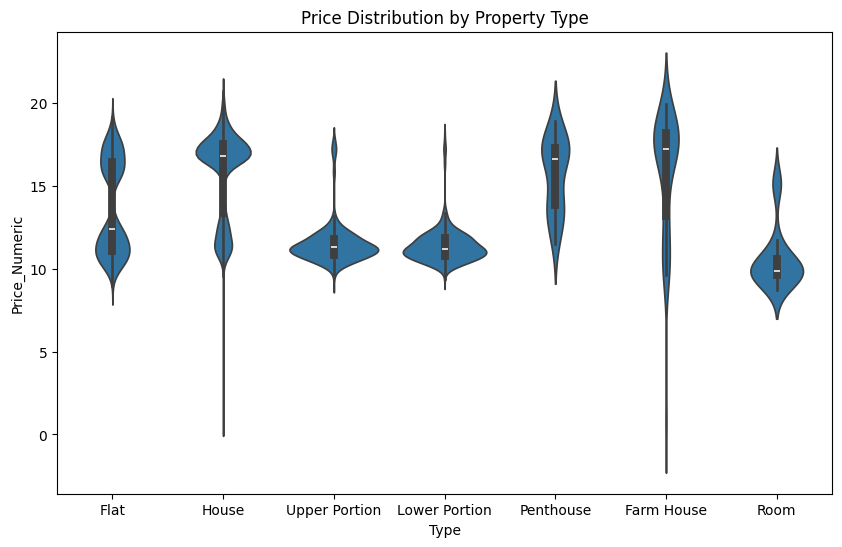

In [122]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type', y='Price_Numeric', data=new_df)
plt.title("Price Distribution by Property Type")
plt.show()

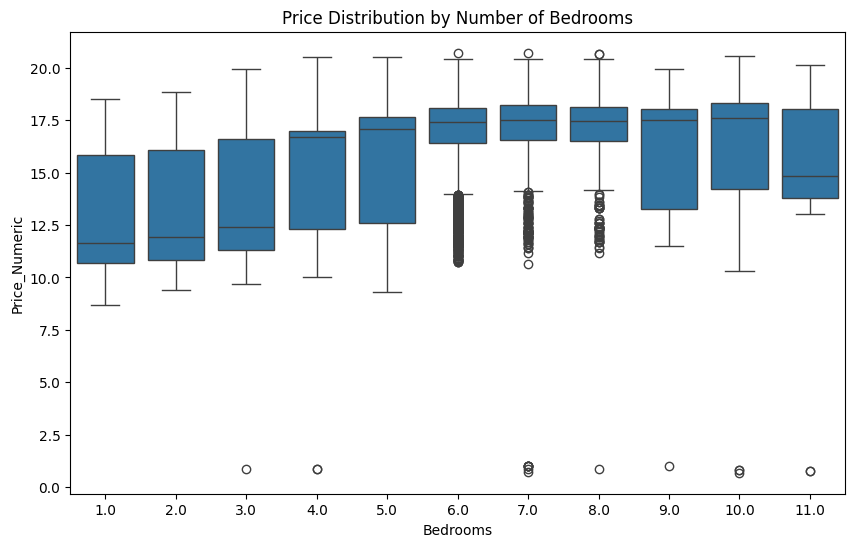

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Bedrooms', y='Price_Numeric', data=new_df)
plt.title("Price Distribution by Number of Bedrooms")
plt.show()

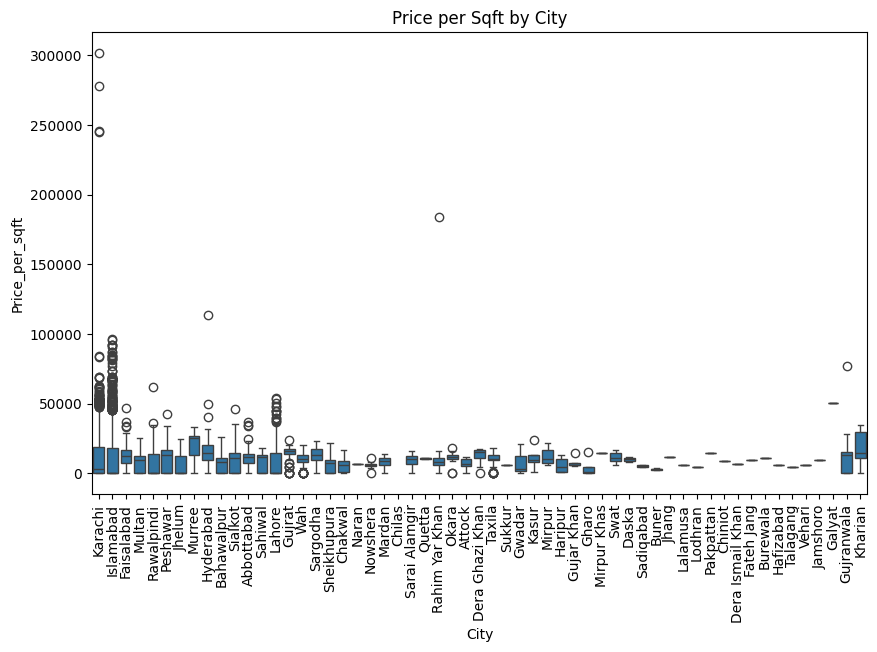

In [126]:
plt.figure(figsize=(10,6))
sns.boxplot(x='City', y='Price_per_sqft', data=new_df)
plt.xticks(rotation=90)
plt.title("Price per Sqft by City")
plt.show()

<p align="center">
  <img src="https://img.shields.io/badge/Insights-Recommendations-green?style=for-the-badge&logo=analytics&logoColor=white">
</p>


## 7. Insights & Recommendations

Based on the exploratory data analysis, here are some key insights and recommendations regarding property prices in Pakistan:

**Key Insights:**

*   **Price Distribution:** The property prices show a skewed distribution, with a large number of properties at lower price points and a few high-value properties. The log transformation helped visualize the distribution better.
*   **Area and Price:** While there is a positive correlation between Area and Price, it is not very strong (correlation coefficient around 0.3). This suggests that while larger properties tend to be more expensive, other factors play a significant role.
*   **Bedrooms and Bathrooms:** There is a stronger positive correlation between the number of Bedrooms and Bathrooms with Price (correlation coefficients around 0.6-0.7). This indicates that the number of rooms is a more significant driver of price than the total area alone.
*   **Total Rooms:** The combined number of Bedrooms and Bathrooms (Total\_Rooms) also shows a strong positive correlation with Price, similar to individual Bedroom and Bathroom counts.
*   **Price per Square Foot:** The Price per Square Foot has a high correlation with Price, suggesting that properties with a higher price per unit area are generally more expensive. This metric can be a useful indicator for comparing property values across different sizes.
*   **City Variations:** Property prices vary significantly across cities, as seen in the violin plot. Major cities like Karachi, Lahore, and Islamabad likely have higher average property prices compared to smaller cities.
*   **Property Type:** The type of property (House, Flat, Upper Portion, etc.) also impacts the price distribution. Houses generally have a wider price range and potentially higher maximum prices compared to Flats or Portions.
*   **Outliers:** There are a considerable number of outliers in 'Area' and 'Price', which likely represent very large or exceptionally expensive properties. While capped for analysis, these outliers highlight the diversity in the real estate market.

**Recommendations:**

*   **Focus on Key Features:** When evaluating properties, pay close attention to the number of bedrooms and bathrooms, as these appear to be strong indicators of price.
*   **Consider Price per Square Foot:** Use the 'Price\_per\_sqft' metric to compare the value of properties of different sizes. A high price per square foot might indicate a prime location or high-quality construction.
*   **Research City-Specific Trends:** Property prices and market dynamics vary significantly by city. Investors should research specific cities of interest to understand local pricing trends and factors.
*   **Analyze Property Type:** Understand the typical price ranges and features for different property types in a given location to make informed decisions.
*   **Investigate Outliers:** While outliers were handled in the analysis, further investigation into these properties could reveal insights into the luxury market or unique property features that command premium prices.
*   **Location Matters:** Although not explicitly engineered as a numerical feature yet, the 'Location' column is crucial. Future analysis should focus on extracting more granular location-based features (e.g., neighborhood, proximity to amenities) to understand their impact on price.
*   **Consider Additional Features:** If available, incorporating additional features like age of the property, amenities (parking, garden, security), and listing quality could further improve the understanding of price drivers.

<p align="center">
  <img src="https://img.shields.io/badge/Conclusion-Next%20Steps-blue?style=for-the-badge&logo=read-the-docs&logoColor=white">
</p>

## . Conclusion & Next Steps

**Summary of Learnings:**

This exploratory data analysis of Zameen.com property listings in Pakistan revealed several key insights into the factors influencing property prices. We observed that:

*   Property prices and areas exhibit skewed distributions, with significant outliers.
*   The number of bedrooms and bathrooms, as well as the calculated total number of rooms, show a stronger positive correlation with price than the total area.
*   Price per square foot is a useful metric for comparing property values across different sizes and is highly correlated with the overall price.
*   Property prices vary significantly across different cities and property types.

**Suggestions for Stakeholders (Investors):**

Based on these findings, investors can consider the following:

*   **Prioritize Bedrooms and Bathrooms:** When evaluating properties, give significant weight to the number of bedrooms and bathrooms, as they appear to be stronger price drivers than the total area alone.
*   **Utilize Price per Square Foot:** Use the price per square foot metric to make informed comparisons between properties of varying sizes and in different locations.
*   **Conduct City-Specific Research:** Recognize that real estate markets are highly localized. Thoroughly research the specific cities or areas you are interested in to understand local price trends, demand, and influencing factors.
*   **Consider Property Type Performance:** Analyze how different property types (houses, flats, etc.) perform in your target market in terms of price appreciation and rental yields.
*   **Investigate High-Value Properties:** While outliers were addressed in this analysis, further investigation into the characteristics of these high-value properties could uncover insights into the luxury market and unique features that command premium prices.
*   **Factor in Location Details:** While not a numerical feature here, location is paramount. Consider factors like neighborhood reputation, proximity to amenities, schools, hospitals, and transportation when evaluating a property's value.
*   **Seek Additional Data:** To build more robust predictive models, consider incorporating additional data points such as the age of the property, specific amenities offered, and potentially even local market trends and economic indicators.

This analysis provides a foundation for understanding the Pakistani real estate market. For more precise predictions and deeper insights, further analysis, including feature engineering and predictive modeling, would be beneficial.